# Sentence Embedding and Sentence Similarity

The concept is to transform a sentence (sequence of words) into a numerical vector. Basically we map a discrete (categorical) variable to a vector representation of continuous numbers which encodes **meaningful semantic information**.

- **Why do we want an embedding representation of a sentence (or text)?**

Because we can find relationship between words using vector operations.

- **How we can create those embeddings?**

There exist different algorithms/models, but they try to follow this principle: a word's meaning comes from the words nearby it. 

- **How are sentence embeddings computed?**

They use a transformer neural network to compute a context-aware representation of each word, then take an average of the context-aware representations. Compute embeddings for each token (e.g., sub-word) rather than word. Enables algorithm to work even for novel words and misspelt words.

- **Text embedding applications:**

They can be used for classification tasks (e.g. Random Forest), clustering (e.g. PCA, t-SNE for dim. red. and K-Means), outlier detection (e.g. IsolationForest), semantic search, recommendation systems...

## Requirements

```bash
conda install -c anaconda scikit-learn
conda install -c conda-forge huggingface_hub sentence-transformers matplotlib
```

In this notebook, we start by importing the necessary libraries. numpy is used for numerical operations, `matplotlib` is used for creating visualizations, and we also import classes from `sentence_transformers` for working with sentence embeddings. We also use cosine_similarity from `scikit-learn` to calculate the cosine similarity between sentence embeddings and TSNE for dimensionality reduction.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# Data

A list of example sentences is defined. These sentences will be used to generate embeddings and measure their similarities.

In [2]:
sentences = [
    "The sun rises early in the morning.",
    "Early morning is the time for sunrise.",
    "Cats are known for their independence.",
    "Independence is a key trait of cats.",
    "Healthy food choices promote well-being.",
    "Well-being depends on healthy food choices.",
    "Rainforests are rich in biodiversity.",
    "Biodiversity thrives in lush rainforests.",
    "Music brings people together in harmony.",
    "Harmony in music unites people's hearts."
]

# Model

The [SentenceTransformer library](https://www.sbert.net/_static/html/models_en_sentence_embeddings.html) offers a diverse range of pre-trained models designed for producing sentence embeddings. To explore the latest State of the Art (SOTA) models and select the one that best suits your requirements, please visit this link.


In [3]:
# We load a pre-trained sentence embedding model.
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

The model is used to encode the sentences, producing a list of sentence embeddings. These embeddings capture the semantic meaning of each sentence.

In [4]:
# Generate sentence embeddings
sentence_embeddings = model.encode(sentences)

Let's take a look about each sentence, such as the sentence itself, its length, the first five elements of its embedding, and the length of the embedding vector.

In [5]:
# Print the first 5 elements of the embeddings, the length of the sentence, and the embedding
for sentence, embedding in zip(sentences, sentence_embeddings):
    print(f"Sentence: {sentence}")
    print(f"Length of Sentence: {len(sentence.split())}")
    print(f"First 5 elements of Embedding: {embedding[:5]}")
    print(f"Length of thhe embedding: {len(embedding)}\n")

Sentence: The sun rises early in the morning.
Length of Sentence: 7
First 5 elements of Embedding: [-0.3626195   0.14469571  0.56399405  0.8695688   0.46524516]
Length of thhe embedding: 384

Sentence: Early morning is the time for sunrise.
Length of Sentence: 7
First 5 elements of Embedding: [-0.49550876  0.25387713  0.18050838  0.82065105  0.5176349 ]
Length of thhe embedding: 384

Sentence: Cats are known for their independence.
Length of Sentence: 6
First 5 elements of Embedding: [ 0.05542907 -0.5241994  -0.2880304   0.65049773 -0.35623223]
Length of thhe embedding: 384

Sentence: Independence is a key trait of cats.
Length of Sentence: 7
First 5 elements of Embedding: [ 0.3251759  -0.61182654 -0.34353787  0.48684806 -0.23630357]
Length of thhe embedding: 384

Sentence: Healthy food choices promote well-being.
Length of Sentence: 5
First 5 elements of Embedding: [ 0.26398522  0.18390821  0.18605992  0.12128826 -0.1963571 ]
Length of thhe embedding: 384

Sentence: Well-being depends

# Similarity between embeddings

The most commonly used similarity measure for comparing sentence embeddings is cosine similarity. Here's why cosine similarity is frequently used:

- **Cosine Similarity**:
Cosine similarity is a metric that measures the cosine of the angle between two non-zero vectors in a multi-dimensional space.
It quantifies the similarity between two vectors by calculating the cosine of the angle between them. Values range from -1 (perfectly dissimilar) to 1 (perfectly similar), with 0 indicating no similarity.
Cosine similarity is particularly effective for text data, including sentence embeddings, because it is insensitive to the magnitude of the vectors. It focuses on the direction of the vectors in a high-dimensional space, making it suitable for capturing semantic similarity.
When using cosine similarity, the magnitude (length) of the vectors does not affect the result, which is an important property when working with text data where sentence lengths can vary.

Other similarity measures that can be used include:

- **Euclidean Distance**:

    Measures the straight-line distance between two points in a multi-dimensional space.
    However, it is sensitive to the magnitude of the vectors, which can be a drawback in some text similarity tasks.

- **Jaccard Similarity**:

    Used for measuring the similarity between sets.
    Often used for text data when comparing the presence or absence of words in two sets (e.g., bag-of-words representations).

- **Pearson Correlation Coefficient**:

    Measures the linear relationship between two sets of data.
    Can be used for similarity when working with numerical features but is less common for text data.


In the context of sentence embeddings and semantic similarity, cosine similarity is widely preferred because it works well with high-dimensional vectors like those generated by neural language models and is robust to varying sentence lengths.

Keep in mind that the choice of similarity measure should align with the specific task and data characteristics. For many NLP tasks, cosine similarity is a reliable and widely used choice.

In [6]:
# Calculate cosine similarity between all pairs of sentences
similarities = cosine_similarity(sentence_embeddings, sentence_embeddings)

A heatmap is generated to visually represent the similarity matrix. Darker colors indicate higher similarity, while lighter colors indicate lower similarity.

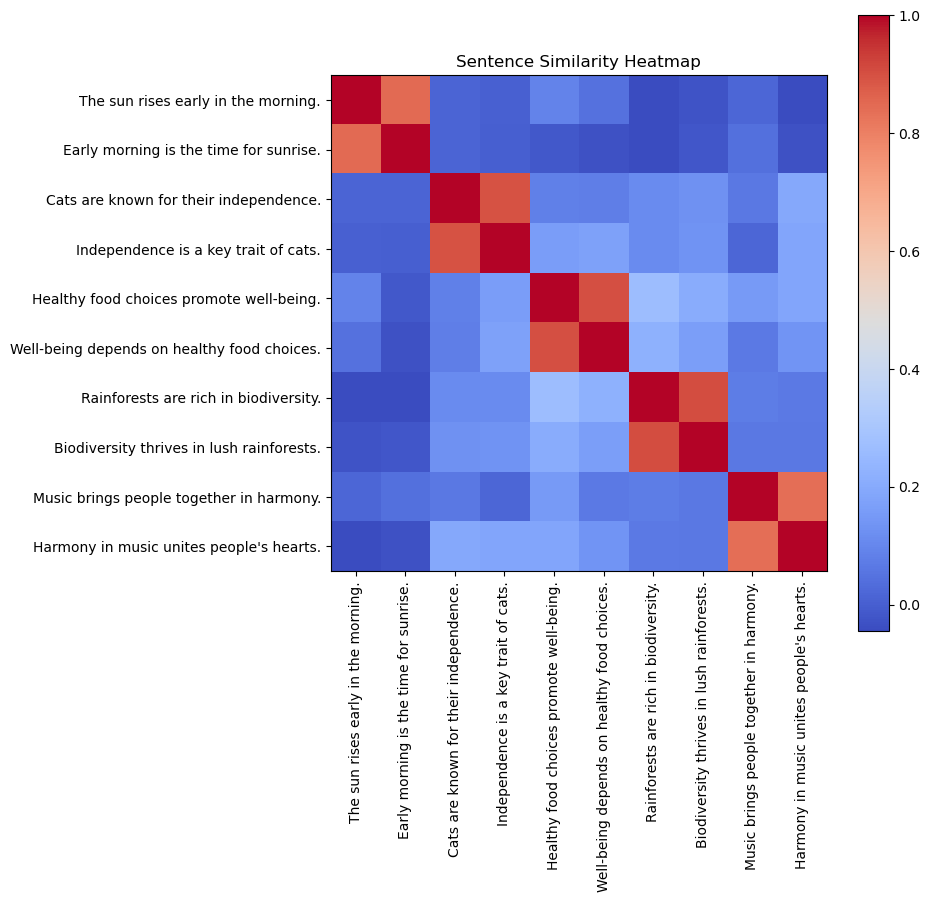

In [7]:
# Create a heatmap to visualize the similarity
plt.figure(figsize=(8, 8))
plt.imshow(similarities, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(sentences)), sentences, rotation=90)
plt.yticks(np.arange(len(sentences)), sentences)
plt.title("Sentence Similarity Heatmap")
plt.colorbar()
plt.show()

`t-Distributed Stochastic Neighbor Embedding (t-SNE)` is applied to reduce the dimensionality of the embeddings to 2D. This makes it possible to visualize the embeddings in a scatter plot.

In [8]:
# Apply t-SNE to reduce dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embedded_sentences = tsne.fit_transform(sentence_embeddings)

In [11]:
# Define a threshold for similarity
similarity_threshold = 0.8

A scatter plot is created, and each point represents a sentence embedding in 2D space. The sentences are annotated on the plot for identification.

This step identifies pairs of sentences with high similarity and draws lines between them on the scatter plot, with similarity values displayed near the lines.

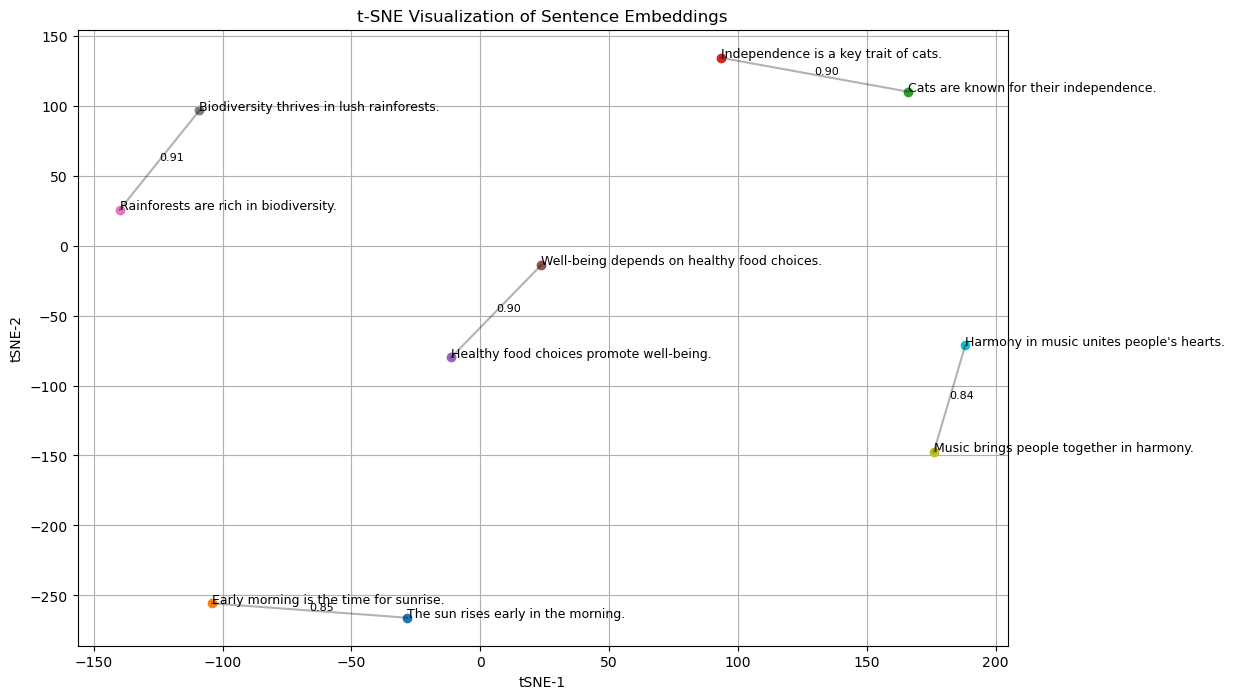

In [12]:
# Create a scatter plot with labels and lines for similar sentences
plt.figure(figsize=(12, 8))
for i, sentence in enumerate(sentences):
    plt.scatter(embedded_sentences[i, 0], embedded_sentences[i, 1])
    plt.annotate(sentence, (embedded_sentences[i, 0], embedded_sentences[i, 1]), fontsize=9)

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = similarities[i, j]
        if similarity > similarity_threshold:
            # Draw a line with the similarity value
            plt.plot([embedded_sentences[i, 0], embedded_sentences[j, 0]],
                     [embedded_sentences[i, 1], embedded_sentences[j, 1]], 'k-', alpha=0.3)
            plt.text((embedded_sentences[i, 0] + embedded_sentences[j, 0]) / 2,
                     (embedded_sentences[i, 1] + embedded_sentences[j, 1]) / 2,
                     f"{similarity:.2f}", fontsize=8)

plt.ylabel("tSNE-2")
plt.xlabel("tSNE-1")
plt.title("t-SNE Visualization of Sentence Embeddings")
plt.grid(True)
plt.show()